# Ejercicios ensembling
En este ejercicio vas a realizar prediciones sobre un dataset de ciudadanos indios diabéticos. Se trata de un problema de clasificación en el que intentaremos predecir 1 (diabético) 0 (no diabético). Todas las variables son numércias.

### 1. Carga las librerias que consideres comunes al notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/ejer_ensembles.csv")
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 2. Lee los datos de [esta direccion](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
Los nombres de columnas son:
```Python
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
```

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1    plas   768 non-null    int64  
 2    pres   768 non-null    int64  
 3    skin   768 non-null    int64  
 4    test   768 non-null    int64  
 5    mass   768 non-null    float64
 6    pedi   768 non-null    float64
 7    age    768 non-null    int64  
 8    class  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

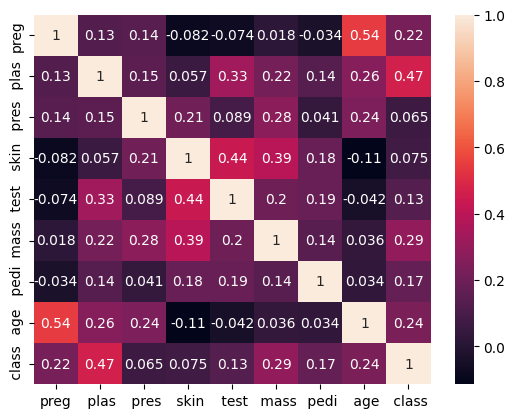

In [33]:
sns.heatmap(df.corr(), annot=True)

In [11]:
df.columns

Index(['preg', ' plas', ' pres', ' skin', ' test', ' mass', ' pedi', ' age',
       ' class'],
      dtype='object')

### 3. Bagging
Para este apartado tendrás que crear un ensemble utilizando la técnica de bagging ([BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)), mediante la cual combinarás 100 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Recuerda utilizar también [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) con 10 kfolds.

**Para este apartado y siguientes, no hace falta que dividas en train/test**, por hacerlo más sencillo. Simplemente divide tus datos en features y target.

Establece una semilla

In [23]:
# Separa los datos en features (X) y target (y)
# Nuestro target es df["class"]
# Muestra el shape de ambos conjuntos
from sklearn.model_selection import train_test_split

X = df.drop(' class', axis=1).values
y = df[' class']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state=42)

In [34]:
X.shape, y.shape

((768, 8), (768,))

In [58]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score  # Import accuracy_score


estimatore = DecisionTreeClassifier(max_depth=3,random_state=42)
#estimator = LogisticRegression()

bag_clf = BaggingClassifier(
    estimator = estimatore,
    n_estimators=1000, # Cantidad de árboles
    #max_samples=100, # Muestras utilizadas en boostrapping
    #bootstrap=True, # Usamos boostrapping
    # max_features = 3 # Features que utiliza en el boostrapping. Cuanto más bajo, mejor generalizará y menos overfitting
    random_state=seed)


bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7597402597402597

In [53]:
# Vamos a grabar la semilla 7 para todos los modelos en la variable seedseed = 7
seed = 7

In [57]:
from sklearn import model_selection
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold, cross_val_score

# Establecer la semilla
seed = 7

# Instanciar el Decision Tree Classifier
decision_tree_clf = DecisionTreeClassifier(max_depth=3, random_state=seed)
# Instanciar el Bagging Classifier con el Decision Tree como base estimator
bagging_clf = BaggingClassifier(
    estimator=decision_tree_clf,  # Estimador base
    n_estimators=100,             # Número de estimadores
    random_state=seed             # Semilla para reproducibilidad
)

kfold = KFold(n_splits = 10)#Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = cross_val_score(decision_tree_clf, X, y, cv = kfold, scoring = "accuracy")

print("Resultados de la validación cruzada:")
print(f"Precisiones: {cv_results}")
print(f"Precisión media: {cv_results.mean():.4f}")


Resultados de la validación cruzada:
Precisiones: [0.67532468 0.77922078 0.7012987  0.64935065 0.77922078 0.81818182
 0.83116883 0.83116883 0.67105263 0.71052632]
Precisión media: 0.7447


In [47]:
# Instancia un Decision Tree Classifier

# Instancia un Bagging Classifier cuyo base estimator sea el DecisionTreeClassifier() , el número de estimadores sea 100 y el random state sea la semilla seed que hemos creado



# Instancia 10 KFolds en la variable kfold
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold, cross_val_score

log_reg_cv = LogisticRegression()

kfold = KFold(n_splits = 10, shuffle = True, random_state = seed)#Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = cross_val_score(log_reg_cv, X_train, y_train, cv = kfold, scoring = "accuracy")

print("Resultados de la validación cruzada:")
print(f"Precisiones: {cv_results}")
print(f"Precisión media: {cv_results.mean():.4f}")



Resultados de la validación cruzada:
Precisiones: [0.74193548 0.77419355 0.67741935 0.75806452 0.7704918  0.73770492
 0.80327869 0.75409836 0.78688525 0.75409836]
Precisión media: 0.7558


/opt/miniconda3/envs/Data_Analysis/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/envs/Data_Analysis/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

In [45]:
# Cálcula el cross validation score del Bagging Classifier con X e y, el cv sea igual a kfold y el scoring sea 'accuracy'
from sklearn.model_selection import cross_val_score

# Calcular el cross validation score
bagging_cv_scores = cross_val_score(bagging_clf, X, y, cv=kfold, scoring='accuracy')

print("Cross-validation scores:", bagging_cv_scores)
print(f"Media CV score: {bagging_cv_scores.mean():.4f}")
# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

Cross-validation scores: [0.76623377 0.75324675 0.74025974 0.77922078 0.80519481 0.79220779
 0.66233766 0.75324675 0.78947368 0.73684211]
Media CV score: 0.7578


In [37]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifie
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
# Obtén la media del cross validation score para el Bagging Classifier
# Simplemente en la variable en la que guardaste el CV usa el método < .mean() >

0.7720437457279563

### 4. Random Forest
En este caso entrena un [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) con 100 árboles y un `max_features` de 3. También con validación cruzada

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
# Instancia un Random Forest Classifier con 100 árboles, max features de 3 y que el random state sea la seed que hemos creado
rf_clf = RandomForestClassifier(
    n_estimators = 100,
    max_depth = 3,
    random_state = seed)

# Cálcula el cross validation score del Random Forest Classifier con X e y, y que el cv sea igual a kfold
# Calcular el cross validation score
rf_cv_scores = cross_val_score(rf_clf, X, y, cv=kfold, scoring='accuracy')

print("Cross-validation scores:", rf_cv_scores)
print(f"Media CV score: {rf_cv_scores.mean():.4f}")


Cross-validation scores: [0.71428571 0.83116883 0.7012987  0.67532468 0.76623377 0.79220779
 0.80519481 0.83116883 0.71052632 0.78947368]
Media CV score: 0.7617


In [ ]:
# Obtén la media del cross validation score para el Random Forest Classifier

0.7733766233766234

### 5. AdaBoost
Implementa un [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) con 30 árboles.

In [63]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    n_estimators = 30,
    random_state = seed,
    learning_rate=0.1)

ada_cv_scores = cross_val_score(ada_clf, X, y, cv=kfold, scoring='accuracy')

print("Cross-validation scores:", ada_cv_scores)
print(f"Media CV score: {ada_cv_scores.mean():.4f}")


/opt/miniconda3/envs/Data_Analysis/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/miniconda3/envs/Data_Analysis/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/miniconda3/envs/Data_Analysis/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/miniconda3/envs/Data_Analysis/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.

Cross-validation scores: [0.67532468 0.80519481 0.75324675 0.63636364 0.77922078 0.80519481
 0.84415584 0.84415584 0.75       0.77631579]
Media CV score: 0.7669


/opt/miniconda3/envs/Data_Analysis/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/miniconda3/envs/Data_Analysis/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/miniconda3/envs/Data_Analysis/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/miniconda3/envs/Data_Analysis/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.

In [ ]:
# Instancia un AdaBoost Classifier con 30 árboles y que el random state sea la seed que hemos creado

# Cálcula el cross validation score del AdaBoost Classifier con X e y, y que el cv sea igual a kfold

# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

In [ ]:
# Obtén la media del cross validation score para el AdaBoost Classifier

0.760457963089542

### 6. GradientBoosting
Implementa un [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) con 100 estimadores

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(
    n_estimators = 100,
    random_state = seed)

gb_cv_scores = cross_val_score(gb_clf, X, y, cv=kfold, scoring='accuracy')

print("Cross-validation scores:", gb_cv_scores)
print(f"Media CV score: {gb_cv_scores.mean():.4f}")


Cross-validation scores: [0.72727273 0.83116883 0.74025974 0.63636364 0.80519481 0.79220779
 0.80519481 0.83116883 0.72368421 0.78947368]
Media CV score: 0.7682


In [ ]:
# Instancia un GradientBoosting Classifier con 100 estimadores y que el random state sea la seed que hemos creado

# Cálcula el cross validation score del GradientBoosting Classifier con X e y, y que el cv sea igual a kfold

# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

In [ ]:
# La misma vaina que estamos haciendo, saca el mean() de la variable del cross_validation

0.7681989063568012

### 7. XGBoost
Para este apartado utiliza un [XGBoostClassifier](https://docs.getml.com/latest/api/getml.predictors.XGBoostClassifier.html) con 100 estimadores. XGBoost no forma parte de la suite de modelos de sklearn, por lo que tendrás que instalarlo con pip install

In [ ]:
# Descomenta la siguiente wea (palabra chilena, no es ningun termino de Machine Learning) para instalar el XGBoost

In [65]:
#!pip install xgboost
import xgboost



In [66]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    random_state = seed)

xgb_cv_scores = cross_val_score(xgb_clf, X, y, cv=kfold, scoring='accuracy')

print("Cross-validation scores:", xgb_cv_scores)
print(f"Media CV score: {xgb_cv_scores.mean():.4f}")


Cross-validation scores: [0.66233766 0.79220779 0.68831169 0.66233766 0.77922078 0.72727273
 0.80519481 0.83116883 0.71052632 0.76315789]
Media CV score: 0.7422


In [ ]:
# Instancia un XGBoost Classifier con 100 estimadores y que el random state sea la seed que hemos creado

# Cálcula el cross validation score del XGBoost Classifier con X e y, y que el cv sea igual a kfold

# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

In [ ]:
# la mean de la wea que acabamos de hacer

0.7395591250854407

### 8. Resultados
Crea un series con los resultados y sus algoritmos, ordenándolos de mayor a menor

In [67]:
result = [bagging_cv_scores.mean(), rf_cv_scores.mean(), ada_cv_scores.mean(), gb_cv_scores.mean(), xgb_cv_scores.mean()]
models = ['Bagging DT', "Random Forest", "Ada Boost", "GradientBoosting", "XGBoost"]

resultados = pd.Series(result, models).sort_values(ascending=False)
resultados

GradientBoosting    0.768199
Ada Boost           0.766917
Random Forest       0.761688
Bagging DT          0.757826
XGBoost             0.742174
dtype: float64

In [ ]:
# Si quieres seguir diviertiendote puedes hacer lo siguiente:

# Continue with:
# split train test
# .fit
# evaluation with test